In [1]:
# Imports and Directory Setup

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directory for the project
project_dir = r"C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage"

# Define the directory where the processed (cleaned) data is stored
processed_data_dir = os.path.join(project_dir, "data", "processed_data")

# Define the path to the combined match data file
match_data_file = os.path.join(processed_data_dir, "all_seasons_match_data.csv")

# Define the directory paths for saving outputs
output_dir = os.path.join(project_dir, "output")
figures_dir = os.path.join(output_dir, "figures")
tables_dir = os.path.join(output_dir, "tables")

print("Required libraries imported.")
print(f"Processed data directory: {processed_data_dir}")
print(f"Match data file path: {match_data_file}")
print(f"Figures output directory: {figures_dir}")
print(f"Tables output directory: {tables_dir}")

# Set a default style for plots
sns.set_theme(style="whitegrid")

Required libraries imported.
Processed data directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data
Match data file path: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_match_data.csv
Figures output directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures
Tables output directory: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\tables


In [2]:
# Load Match Data

print(f"\nLoading match data from: {match_data_file}")
try:
    match_df = pd.read_csv(match_data_file, encoding='utf-8')
    print(f" Successfully loaded match data. Shape: {match_df.shape}")
except FileNotFoundError:
    print(f"Error: File not found at {match_data_file}.")
    print(" Please ensure the file exists in the processed_data directory.")
    match_df = None
except Exception as e:
    print(f"An error occurred loading the match data: {e}")
    match_df = None


Loading match data from: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_match_data.csv
 Successfully loaded match data. Shape: (2280, 12)


In [5]:
# Initial Data Inspection

# Check if data loaded successfully before inspecting
if match_df is not None:
    print("\n--- First 5 Rows (Head) ---")
    display(match_df.head())

    print("\n--- DataFrame Info ---")
    # Simply call .info() - Jupyter will display its output
    match_df.info()

    print("\n--- Summary Statistics ---")
    # Include 'all' to get stats for object/category columns too
    display(match_df.describe(include='all'))

else:
    print("\nCannot perform inspection because match data failed to load.")


--- First 5 Rows (Head) ---


,dayofweek,date,start_time,home_team,home_xg,score,away_xg,away_team,attendance,venue,referee,season
0,Fri,2018-08-10,20:00,Manchester Utd,1.5,Score: 2 - 1,1.8,Leicester City,74439.0,Old Trafford,Andre Marriner,2018-2019
1,Sat,2018-08-11,12:30,Newcastle Utd,1.0,Score: 1 - 2,2.0,Tottenham,51749.0,St. James' Park,Martin Atkinson,2018-2019
2,Sat,2018-08-11,15:00,Fulham,0.7,Score: 0 - 2,1.0,Crystal Palace,24821.0,Craven Cottage,Mike Dean,2018-2019
3,Sat,2018-08-11,15:00,Bournemouth,2.2,Score: 2 - 0,1.4,Cardiff City,10353.0,Vitality Stadium,Kevin Friend,2018-2019
4,Sat,2018-08-11,15:00,Huddersfield,0.3,Score: 0 - 3,1.9,Chelsea,24121.0,The John Smith's Stadium,Chris Kavanagh,2018-2019



--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dayofweek   2280 non-null   object 
 1   date        2280 non-null   object 
 2   start_time  2280 non-null   object 
 3   home_team   2280 non-null   object 
 4   home_xg     2280 non-null   float64
 5   score       2280 non-null   object 
 6   away_xg     2280 non-null   float64
 7   away_team   2280 non-null   object 
 8   attendance  2280 non-null   float64
 9   venue       2280 non-null   object 
 10  referee     2280 non-null   object 
 11  season      2280 non-null   object 
dtypes: float64(3), object(9)
memory usage: 213.9+ KB

--- Summary Statistics ---


,dayofweek,date,start_time,home_team,home_xg,score,away_xg,away_team,attendance,venue,referee,season
count,2280,2280,2280,2280,2280.000000,2280,2280.000000,2280,2280.000000,2280,2280,2280
unique,7,718,24,28,NaN,46,NaN,28,NaN,31,37,6
top,Sat,2024-05-19,15:00,Manchester Utd,NaN,Score: 1 - 1,NaN,Wolves,NaN,Old Trafford,Anthony Taylor,2018-2019
freq,1065,10,712,114,NaN,239,NaN,114,NaN,114,177,380
mean,NaN,NaN,NaN,NaN,1.518333,NaN,1.254167,NaN,31118.999123,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.855207,NaN,0.761324,NaN,21580.506976,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.900000,NaN,0.700000,NaN,16876.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.400000,NaN,1.100000,NaN,31062.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.100000,NaN,1.700000,NaN,52123.250000,NaN,NaN,NaN


In [8]:
# Feature Engineering from Score

# Check if match_df exists
if 'match_df' in locals() and match_df is not None:
    print("\nPerforming feature engineering (Goals, Difference, Points)...")

    # Make a copy to avoid SettingWithCopyWarning
    match_df = match_df.copy()

    # Check if 'score' column exists
    if 'score' in match_df.columns:
        try:
            # Extract Home and Away Goals
            # Expected format: "Score: H - A"
            split_scores = match_df['score'].str.split(': ', expand=True)[1].str.split(' - ', expand=True)
            # Convert to numeric, coercing errors to NaN
            match_df['home_goals'] = pd.to_numeric(split_scores[0].str.strip(), errors='coerce')
            match_df['away_goals'] = pd.to_numeric(split_scores[1].str.strip(), errors='coerce')

            # Check for parsing errors (NaNs) - only if needed for debugging
            if match_df['home_goals'].isnull().any() or match_df['away_goals'].isnull().any():
                 print("Warning: Some scores may not have been parsed correctly (resulting in NaN goals).")

            # Calculate Goal Difference
            match_df['goal_difference'] = match_df['home_goals'] - match_df['away_goals']

            # Calculate Home Points
            conditions = [
                match_df['home_goals'] > match_df['away_goals'], # Home Win
                match_df['home_goals'] == match_df['away_goals'], # Draw
                match_df['home_goals'] < match_df['away_goals'] # Home Loss
            ]
            point_values = [3, 1, 0]
            match_df['home_points'] = np.select(conditions, point_values, default=np.nan)

            print("Feature engineering complete.")

            # Verification
            print("\n--- Verification of new columns (first 5 rows) ---")
            display(match_df[['score', 'home_goals', 'away_goals', 'goal_difference', 'home_points']].head())

        except Exception as e:
            print(f"Error during feature engineering: {e}")
            # Ensure columns exist as NaN if error occurs
            if 'home_goals' not in match_df.columns: match_df['home_goals'] = np.nan
            if 'away_goals' not in match_df.columns: match_df['away_goals'] = np.nan
            if 'goal_difference' not in match_df.columns: match_df['goal_difference'] = np.nan
            if 'home_points' not in match_df.columns: match_df['home_points'] = np.nan

    else:
        print("Error: 'score' column not found in DataFrame.")

else:
    print("\nSkipping feature engineering because match_df DataFrame not available.")


Performing feature engineering (Goals, Difference, Points)...
Feature engineering complete.

--- Verification of new columns (first 5 rows) ---


,score,home_goals,away_goals,goal_difference,home_points
0,Score: 2 - 1,2,1,1,3.0
1,Score: 1 - 2,1,2,-1,0.0
2,Score: 0 - 2,0,2,-2,0.0
3,Score: 2 - 0,2,0,2,3.0
4,Score: 0 - 3,0,3,-3,0.0


In [9]:
# Define Analysis Periods ('COVID-Affected' vs 'Normal')

# Check if match_df exists
if 'match_df' in locals() and match_df is not None:
    print("\nDefining analysis periods based on attendance...")
    print(" Confirmed no missing values in 'attendance' column.")

    # Define the threshold based on user information
    attendance_threshold = 10000
    print(f" Using attendance threshold: < {attendance_threshold} for 'COVID-Affected'.")

    # Create the 'period' column using np.where
    match_df['period'] = np.where(match_df['attendance'] < attendance_threshold, 'COVID-Affected', 'Normal')

    print(" Created 'period' column.")

    # Verification
    print("\n--- Value Counts for 'period' column ---")
    print(match_df['period'].value_counts())

else:
    print("\nSkipping period definition because match_df DataFrame not available.")


Defining analysis periods based on attendance...
 Confirmed no missing values in 'attendance' column.
 Using attendance threshold: < 10000 for 'COVID-Affected'.
 Created 'period' column.

--- Value Counts for 'period' column ---
Normal            1812
COVID-Affected     468
Name: period, dtype: int64


In [10]:
# Compare Home Advantage Metrics Across Periods

# Check if match_df exists and has the required columns
if 'match_df' in locals() and match_df is not None and 'period' in match_df.columns and 'goal_difference' in match_df.columns and 'home_points' in match_df.columns:
    print("\nCalculating average home advantage metrics per period...")

    # Group by the 'period' column and calculate the mean for relevant metrics
    period_comparison = match_df.groupby('period')[[
        'goal_difference',
        'home_points'
    ]].mean().reset_index()

    print("\n--- Comparison of Average Metrics ('COVID-Affected' vs 'Normal') ---")
    # Display the resulting comparison table
    display(period_comparison)
    print("-" * 60)

else:
    print("\nSkipping comparison because match_df or required columns ('period', 'goal_difference', 'home_points') not available.")
    print(" Ensure the previous cells creating these have been run successfully.")


Calculating average home advantage metrics per period...

--- Comparison of Average Metrics ('COVID-Affected' vs 'Normal') ---


,period,goal_difference,home_points
0,COVID-Affected,0.057692,1.397436
1,Normal,0.316777,1.603753


------------------------------------------------------------



Generating bar charts comparing metrics across periods...
 Comparison plots saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\period_comparison_bar_charts.png


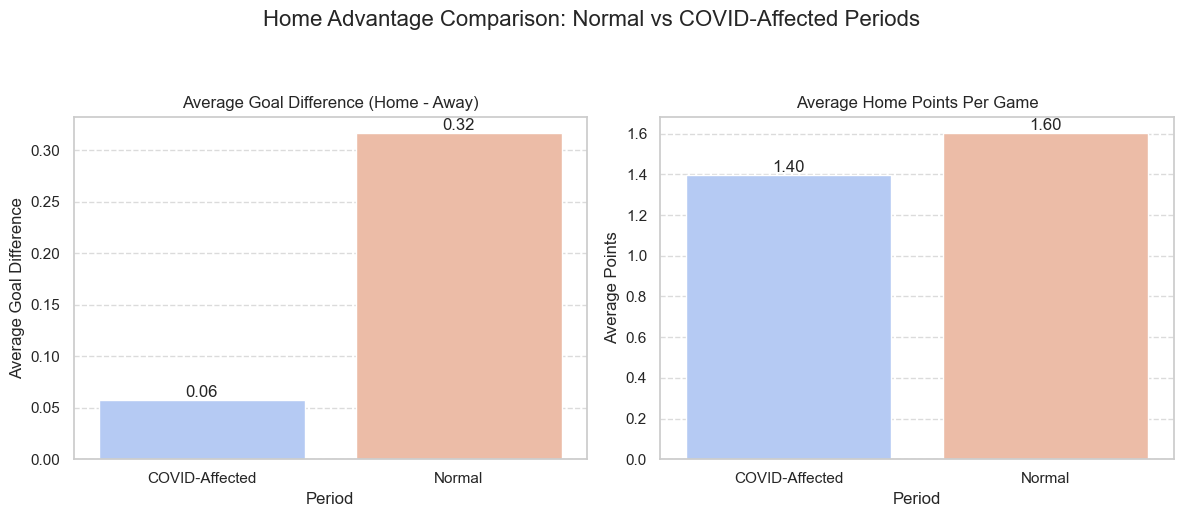

In [11]:
# Visualise Home Advantage Metrics Across Periods

# Check if the period_comparison DataFrame exists from the previous cell
if 'period_comparison' in locals() and period_comparison is not None:
    print("\nGenerating bar charts comparing metrics across periods...")

    # Create Figure with Two Subplots
    # Create a figure and a set of subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # Adjust figsize as needed
    fig.suptitle('Home Advantage Comparison: Normal vs COVID-Affected Periods', fontsize=16, y=1.03)

    # Plot 1: Average Goal Difference
    sns.barplot(ax=axes[0], x='period', y='goal_difference', data=period_comparison, palette='coolwarm')
    axes[0].set_title('Average Goal Difference (Home - Away)')
    axes[0].set_xlabel('Period')
    axes[0].set_ylabel('Average Goal Difference')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    # Add exact values on bars
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.2f')


    # Plot 2: Average Home Points
    sns.barplot(ax=axes[1], x='period', y='home_points', data=period_comparison, palette='coolwarm')
    axes[1].set_title('Average Home Points Per Game')
    axes[1].set_xlabel('Period')
    axes[1].set_ylabel('Average Points')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    # Add exact values on bars
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.2f')


    # Final Touches & Saving
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to prevent overlap

    # Define filename and save
    plot_filename_period_comp = os.path.join(figures_dir, 'period_comparison_bar_charts.png')
    try:
        plt.savefig(plot_filename_period_comp, bbox_inches='tight', dpi=300)
        print(f" Comparison plots saved successfully to: {plot_filename_period_comp}")
    except Exception as e:
        print(f" An error occurred while saving the comparison plots: {e}")

    # Display the plot
    plt.show()

else:
    print("\nSkipping visualisation because period_comparison DataFrame not available.")
    print(" Ensure the previous cell calculating this has been run successfully.")